In [70]:
import sqlite3
import networkx as nx
import matplotlib.pyplot as plt

In [71]:
import matplotlib.pyplot as plt
import networkx as nx
import sqlite3
import matplotlib.patches as mpatches

def afficher_graphe_transparence_ia(db_path):
    try:
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()

        cursor.execute("""
        SELECT sc1.nom, sc2.nom
        FROM Relations r
        JOIN SousConcepts sc1 ON r.source_id = sc1.id
        JOIN SousConcepts sc2 ON r.cible_id = sc2.id;
        """)
        relations_sous_concepts = cursor.fetchall()

        cursor.execute("""
        SELECT sc.nom AS sous_concept, c.nom AS concept, p.nom AS principe
        FROM SousConcepts sc
        JOIN Concepts c ON sc.concept_id = c.id
        JOIN Principes p ON c.principe_id = p.id;
        """)
        structure = cursor.fetchall()

    except Exception as e:
        print(f"Erreur lors de la récupération des données : {e}")
        return
    finally:
        conn.close()

    G = nx.DiGraph()

    couleur_sous_concept = "#1f78b4"
    couleur_concept = "#33a02c"
    couleur_principe = "#e31a1c"

    labels = {}
    colors = {}

    for sous_concept, concept, principe in structure:
        G.add_node(sous_concept)
        G.add_node(concept)
        G.add_node(principe)

        G.add_edge(sous_concept, concept, weight=10)
        G.add_edge(concept, principe, weight=10)

        colors[sous_concept] = couleur_sous_concept
        colors[concept] = couleur_concept
        colors[principe] = couleur_principe

        labels[sous_concept] = sous_concept
        labels[concept] = concept
        labels[principe] = principe

    for source, cible in relations_sous_concepts:
        G.add_edge(source, cible, weight=5)

    node_colors = [colors.get(node, "#cccccc") for node in G.nodes()]

    pos = nx.spring_layout(G, k=1, weight='weight', seed=42)

    plt.figure(figsize=(16, 12))

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=2200, alpha=0.9)
    label_pos = {k: (v[0], v[1] + 0.03) for k, v in pos.items()}
    nx.draw_networkx_labels(G, label_pos, labels, font_size=9, font_weight='bold')
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color='black', width=2.5)



    legend_elements = [
        mpatches.Patch(color=couleur_sous_concept, label="Métriques"),
        mpatches.Patch(color=couleur_concept, label="Concepts"),
        mpatches.Patch(color=couleur_principe, label="Principes")
    ]
    plt.legend(handles=legend_elements, title="Types de noeuds", loc='lower left', fontsize=10, title_fontsize=11)

    plt.title("Graphe complet de la base de données transparence IA", fontsize=16)
    plt.axis('off')
    plt.show()


# Exemple d'appel (adapter db_path selon ta config)
# afficher_graphe_transparence_ia("transparence_ia.db")


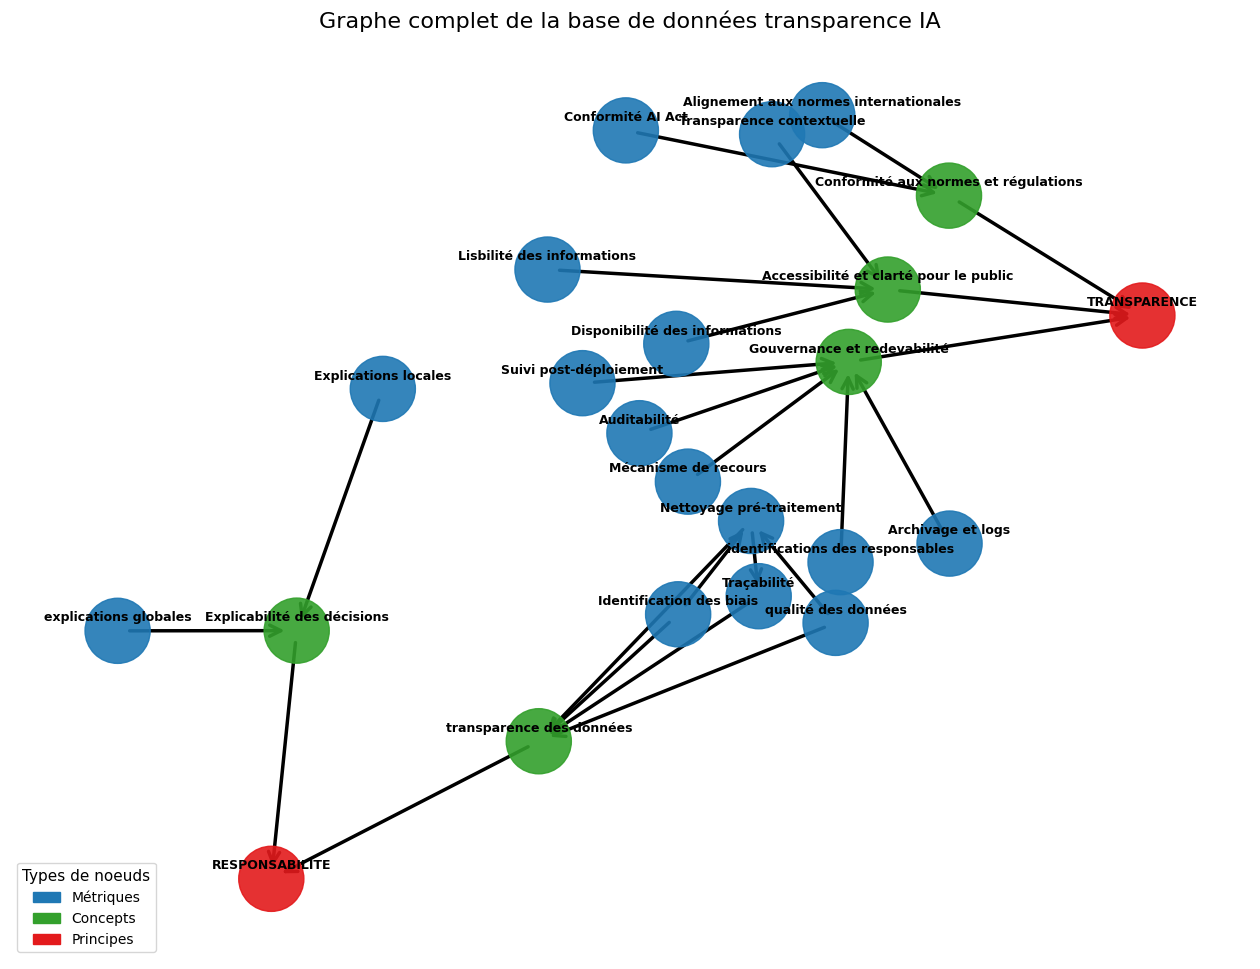

In [72]:
afficher_graphe_transparence_ia("transparence_ia.db")